In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import sympy

In [2]:
data=pd.read_excel("xray-data.xlsx")

In [3]:
data.head()

,Unnamed: 0,h,k,l,2Theta
0,NaN,0.0,1.0,2.0,21.375
1,NaN,0.0,2.0,4.0,43.333
2,NaN,0.0,3.0,6.0,67.180
3,NaN,0.0,4.0,8.0,94.941
4,NaN,0.0,5.0,10.0,134.080


In [4]:
wavelength=1.54056  # k alpha 1

In [5]:
data["theta_rad"]=np.deg2rad(data["2Theta"]/2)

In [18]:
df=data[19:]

In [19]:
df

,Unnamed: 0,h,k,l,2Theta,theta_rad
19,NaN,0.0,0.0,1.0,6.9398,0.060561
20,NaN,0.0,0.0,2.0,13.7980,0.120410
21,NaN,0.0,0.0,3.0,20.7325,0.180925
22,NaN,0.0,0.0,4.0,27.7460,0.242130
23,NaN,0.0,0.0,5.0,34.8700,0.304298
24,NaN,0.0,0.0,6.0,42.1410,0.367750
25,NaN,0.0,0.0,7.0,49.5920,0.432772
26,NaN,0.0,0.0,8.0,57.2650,0.499731
27,NaN,0.0,0.0,9.0,65.2400,0.569326
28,NaN,0.0,0.0,10.0,73.5730,0.642046


In [20]:
list(data.loc[19])

[nan, 0.0, 0.0, 1.0, 6.9398, 0.060561179714951244]

# Define Sympy variable


In [21]:
a,b,c,beta=sympy.symbols("a b c beta")

## Monoclinic crystal

$$\frac{1}{d^2}=\frac{1}{\sin^2\beta} \left(
\left(\frac{h}{a}\right)^2 
+ \left(\frac{k \sin\beta}{b}\right)^2 
+ \left(\frac{l}{c}\right)^2 
- \frac{2 h l \cos\beta}{a c}\right)$$

### If $h=0,k=0$

$$\frac{1}{d^2}=\frac{1}{\sin^2\beta} \left(\frac{l}{c}\right)^2 $$

Brag's Law

$$2 d\sin\theta = n \lambda$$

combining it gives us (n=1)

$$\frac{1}{(\lambda/\sin\theta)^2}=\frac{1}{\sin^2\beta} \left(\frac{l}{c}\right)^2 $$

if we know $\beta$ we can solve for $c$ for each $(00l)$ series planes

## Table
| $\theta$    | $c$ |
| -------- | ------- |
| $\theta_1$   | $c_1$    |
| $\theta_2$  | $c_2$    |
| $\theta_3$     | $c_3$    |

In [22]:
def d_hkl_monoclinic(h,k,l,beta):
    term1=(h/a)**2 + (k*sympy.sin(beta)/b)**2 + (l/c)**2 - 2*h*l*sympy.cos(beta)/(a*c)
    dsquared=sympy.sin(beta)**2/term1
#     ddistance=sympy.sqrt(dsquared)
#     print(dsquared)
#     print(ddistance)
    return dsquared

In [23]:
dsquared=d_hkl_monoclinic(0,0,2,1.3)
print(dsquared)

0.232111094171118*c**2


In [24]:
theta=1.27958814109964
sympy.solve(dsquared*sympy.sin(theta)**2-(wavelength/2)**2,c)

[-1.66909687906609, 1.66909687906609]

In [27]:

d_vs_theta=[]
beta=np.deg2rad(98.4)
ranges=range(20,34+1)
# ranges=[7,8,9,11]
for i in ranges:
    print("index=", i)
    _,h,k,l,_,theta=list(data.loc[i])
    dsquared=d_hkl_monoclinic(h,k,l,beta)
    print(dsquared)
    solutions=sympy.solve(dsquared*sympy.sin(theta)**2-(wavelength/2)**2,c)
    # solutions=sympy.solve(dsquared.subs(c,13.006532295566185)*sympy.sin(theta)**2-(wavelength/2)**2,b)
    # solutions=sympy.solve(dsquared.subs(b,5.5152862735714345)*sympy.sin(theta)**2-(wavelength/2)**2,c)
    # solutions=sympy.solve(dsquared.subs(b,5.515990401428908)*sympy.sin(theta)**2-(wavelength/2)**2,a)
    print(solutions)
    d_vs_theta.append([theta,solutions[1]])

index= 20
0.244664937191508*c**2
[-12.9643036693796, 12.9643036693796]
index= 21
0.108739972085115*c**2
[-12.9815609987414, 12.9815609987414]
index= 22
0.0611662342978771*c**2
[-12.9896324421742, 12.9896324421742]
index= 23
0.0391463899506413*c**2
[-12.9935156671763, 12.9935156671763]
index= 24
0.0271849930212787*c**2
[-12.9946711067609, 12.9946711067609]
index= 25
0.0199726479340007*c**2
[-12.9961305986203, 12.9961305986203]
index= 26
0.0152915585744693*c**2
[-12.9991567117732, 12.9991567117732]
index= 27
0.0120822191205683*c**2
[-12.9997282810252, 12.9997282810252]
index= 28
0.00978659748766034*c**2
[-13.0024635578595, 13.0024635578595]
index= 29
0.00808809709723995*c**2
[-13.0019980970061, 13.0019980970061]
index= 30
0.00679624825531968*c**2
[-13.0053570482012, 13.0053570482012]
index= 31
0.00579088608737298*c**2
[-13.0044049021109, 13.0044049021109]
index= 32
0.00499316198350017*c**2
[-13.0049399348917, 13.0049399348917]
index= 33
0.00434959888340459*c**2
[-13.0057683905197, 13.005

In [28]:
theta_vs_param=np.array(d_vs_theta,dtype=float)

In [29]:
theta_vs_param


array([[ 0.12041027, 12.96430367],
       [ 0.18092519, 12.981561  ],
       [ 0.24212953, 12.98963244],
       [ 0.30429816, 12.99351567],
       [ 0.3677496 , 12.99467111],
       [ 0.43277184, 12.9961306 ],
       [ 0.4997314 , 12.99915671],
       [ 0.5693264 , 12.99972828],
       [ 0.64204555, 13.00246356],
       [ 0.71914546, 13.0019981 ],
       [ 0.80155991, 13.00535705],
       [ 0.89206396, 13.0044049 ],
       [ 0.99399119, 13.00493993],
       [ 1.11525754, 13.00576839],
       [ 1.27958814, 13.00569646]])

In [31]:
df=pd.DataFrame(theta_vs_param, columns=["theta_rad", "parameter"],
                index=np.arange(1,theta_vs_param.shape[0]+1))

In [32]:
df["theta"]=np.rad2deg(df["theta_rad"])

In [23]:
# df.to_latex("parameter-a-fitting.tex", columns=["theta", "parameter"])

In [33]:
def xfunc(theta):
    cos2=np.cos(theta)**2
    sin=np.sin(theta)
    return cos2/sin + cos2/theta

# def xfunc2(theta):
#     cos2=np.cos(theta)**2
#     return cos2

In [34]:
xfunc(theta_vs_param[:,0])

array([16.39003295, 10.7256628 ,  7.82346921,  6.02912629,  4.78977183,
        3.86930105,  3.14924838,  2.56204956,  2.07006388,  1.6464303 ,
        1.27708308,  0.94819915,  0.65401343,  0.38908148,  0.15047587])

In [83]:
# np.cos(d_vs_theta[:,1])

In [84]:
# d_vs_theta[:,1]

Text(0.5, 0, '$\\cos^2\\theta/\\sin\\theta + \\cos^2\\theta/\\theta$')

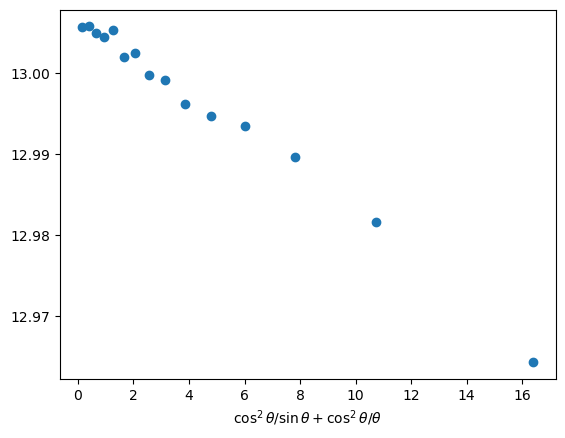

In [35]:
xx, yy = xfunc(theta_vs_param[:,0]), theta_vs_param[:,1]
plt.plot(xx,yy,'o')
plt.xlabel(r"$\cos^2\theta/\sin\theta + \cos^2\theta/\theta$")

In [36]:
xslice=xx[:]
yslice=yy[:]
regress=stats.linregress(xslice,yslice)
regress

LinregressResult(slope=-0.0024867604891671115, intercept=13.006979051060194, rvalue=-0.9946154875926801, pvalue=3.468900821561465e-14, stderr=7.186374559640027e-05, intercept_stderr=0.00043347323601911764)

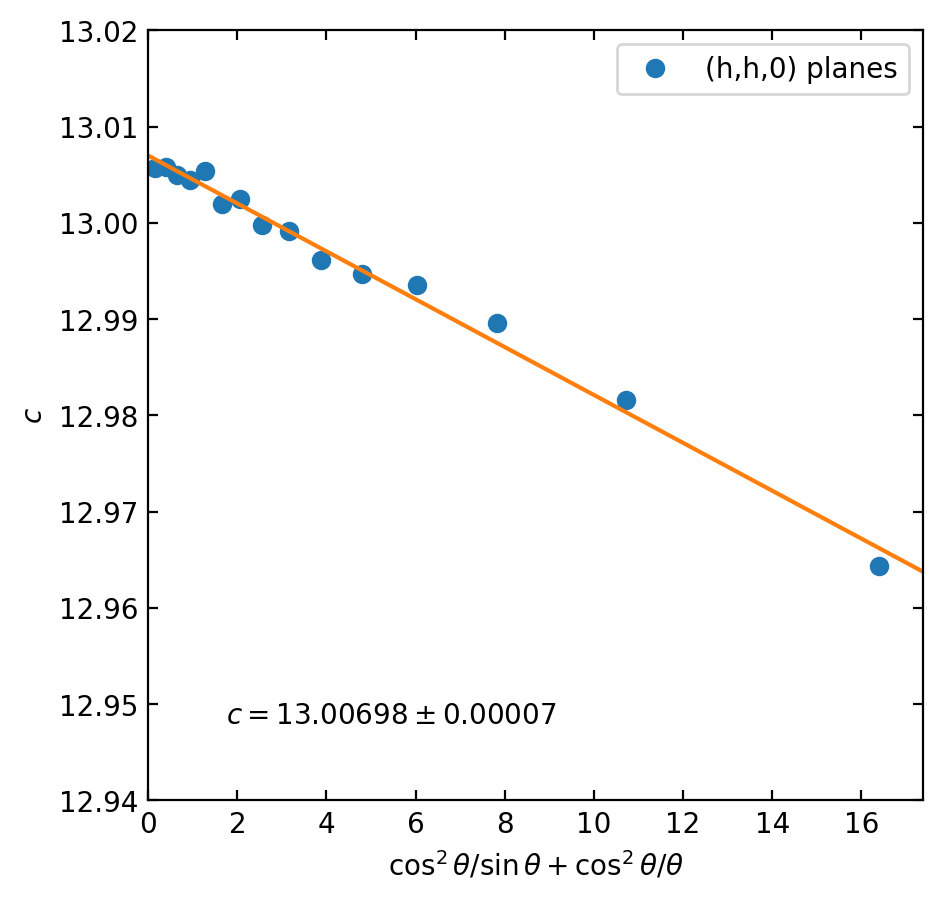

In [41]:
# figsize=(5,3.5)
fig,ax=plt.subplots(dpi=200, figsize=(5,5))
plt.plot(xx,yy,'o',label="(h,h,0) planes")

xvalues=np.linspace(-5,35)
plt.plot(xvalues,xvalues*regress[0]+regress[1])
plt.xlabel(r"$\cos^2\theta/\sin\theta + \cos^2\theta/\theta$")
plt.ylabel(r"$c$")
plt.legend()
plt.xlim([0,np.max(xx)+1])
plt.ylim([12.94, 13.02])
ax.text(0.1,0.1,r"$c={:.5f}\pm {:.5f}$".format(regress[1],regress[-1]), transform=ax.transAxes)
ax.tick_params(direction="in",top=True, right=True)
# plt.savefig("parameter-a-plne-hh0-plane.pdf")

In [ ]:
# c1=0.55
# c2=0.45
# c1*12.985255718775832+c2*13.006

In [36]:
import numpy as np

def least_sq_fit_y(X, Y):
    """
    Calculate a "MODEL-1" least squares fit.

    The line is fit by MINIMIZING the residuals in Y only.

    The equation of the line is:     Y = my * X + by.

    Equations are from Bevington & Robinson (1992)
    Data Reduction and Error Analysis for the Physical Sciences, 2nd Ed."
    pp: 104, 108-109, 199.

    Data are input and output as follows:

    my, by, ry, smy, sby = lsqfity(X,Y)
    X     =    x data (vector)
    Y     =    y data (vector)
    my    =    slope
    by    =    y-intercept
    ry    =    correlation coefficient
    smy   =    standard deviation of the slope
    sby   =    standard deviation of the y-intercept

    """

    X, Y = map(np.asanyarray, (X, Y))

    # Determine the size of the vector.
    n = len(X)

    # Calculate the sums.

    Sx = np.sum(X)
    Sy = np.sum(Y)
    Sx2 = np.sum(X ** 2)
    Sxy = np.sum(X * Y)
    Sy2 = np.sum(Y ** 2)

    # Calculate re-used expressions.
    num = n * Sxy - Sx * Sy
    den = n * Sx2 - Sx ** 2

    # Calculate my, by, ry, s2, smy and sby.
    my = num / den
    by = (Sx2 * Sy - Sx * Sxy) / den
    ry = num / (np.sqrt(den) * np.sqrt(n * Sy2 - Sy ** 2))

    diff = Y - by - my * X

    s2 = np.sum(diff * diff) / (n - 2)
    smy = np.sqrt(n * s2 / den)
    sby = np.sqrt(Sx2 * s2 / den)

    return my, by, ry, smy, sby

In [38]:
least_sq_fit_y(xx,yy)

(-0.0040561128218793395,
 13.01298335790663,
 -0.9744070919809854,
 0.00025952313764542105,
 0.002704551226324598)